<a href="https://colab.research.google.com/github/perezm-496/DL_2022/blob/main/01_Intro_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Michaelle A. Perez

# Neural Networks 1

- ML Problem
- Classification Problem
- Data
- Model
- Optimization Process
- Evaluation


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


## Data

Artificial data.
Linearly Separable


## A Simple Classification Problem

The desired predictions are:
$$\hat{y} = \begin{cases} 1 & \text{positive} \\ 0 & \text{negative} \end{cases}$$


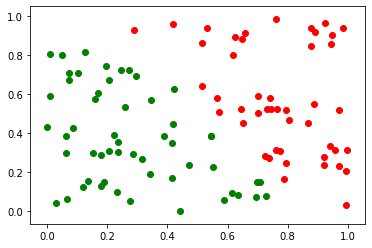

In [ ]:
name = "01_data.npz"
data = np.load(name)
    
# Examples -- Training
X = data['X_train'] # input values
t = data['t_train'] # target values

positives = X[:,t == 1][:-1,:]
negatives = X[:,t == 0][:-1,:]

plt.scatter(positives[0,:], positives[1,:], color='red')
plt.scatter(negatives[0,:], negatives[1,:], color='green')

# Model

Using a linear model described by:
$$ \hat{y} = h(W\, X)$$

This is a simplification of $\hat{y} = h(W \, X + b)$.


## Activation Function

- To produce a prediction as 1 or 0, you should use a Heaviside function.
- We go with a sigmoid function to make use of calculus, since is diferentiable.
$$\sigma(t) = \frac{1}{1 + e^{-t}}$$

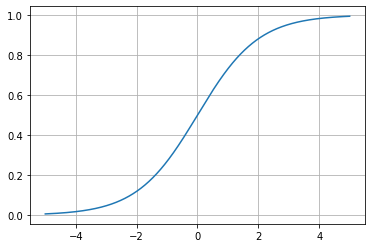

In [ ]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

tt = np.linspace(-5, 5, 1000)
plt.grid()
plt.plot(tt, sigmoid(tt))

# Optimization Process

You don't know what $W$ will make the best job for the classification.

## A Loss Function.

We use a function that penalizes miss classifications and rewards correct classifications. In fact we try to approximate $p(Y = y_i \, | \, X = x_i)$. For that we use:

$$L(t, \hat{y}) =  -t \, \log \hat{y} - (1-t) \, \log ( 1 - \hat{y}) $$.

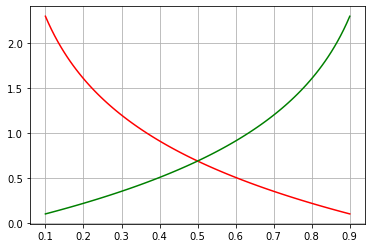

In [ ]:
def log_loss(t, y):
    return -t*np.log(y) - (1-t)*np.log( 1 - y)

yy = np.linspace(0.1, 0.9, 100)

ax = plt.subplot()

ax.grid()
ax.plot(yy, log_loss(1, yy), label='positive case', color='red')
ax.plot(yy, log_loss(0, yy), label='negative case', color='green')


## Cost

The cost is the sum of the loss function over all the examples:
$$J = \frac{1}{m} \sum_{i=1}^N L(t^{(i)}, \hat{y}^{(i)})$$

In [ ]:
def cost(t, y):
    N = y.shape[0]
    return np.sum(log_loss(t, y))


## Parameter Initialization

We start with a random value.

In [ ]:
W = np.random.rand(1, 3)
y = sigmoid(W.dot(X)) # Output
print(f"Costo inicial: {cost(T, y)}")

Costo inicial: 82.02456796641329


# Optimization

We use the idea of gradient descent. Notice that this has some hyperparamteres.

## Learning rate

$\alpha$ in the equation:
$$ W = W - \alpha \nabla J$$
is called the learning rate.

## Epochs

Each time that all the data is used to make an update of the paramters $W$.

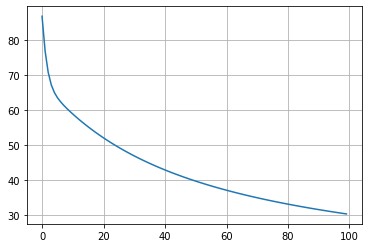

In [ ]:
W = np.random.rand(1, 3) # Inicialización
total_epochs = 100 # total de iteraciones
lr = 0.009 # Learning Rate
cost_list = [] # Llevamos control del costo
for epoch in range(total_epochs):
    Y = sigmoid(W.dot(X)) # Salida del modelo
    m = Y.shape[0]
    dW = 1/m*np.dot((Y - T), X.T) # Gradiente -- dW
    W = W - lr*dW # Actualización
    cost_list.append(cost(T, Y)) # Costo agregado a lista.

plt.grid()
plt.plot(range(100), cost_list)
    

# Evaluation

You build a model that computes $\hat{y}$ a prediction for $P(Y = t^{(i)} \, | \, X = x^{(i)})$. To give a definitive answer it is used the prediction values. The predicted values are a function of threshold value:
$$\text{pred}(x^{(i)}) = [ \sigma(W \ x^{(i)}) \geq B ]$$

To statistically analyze how good the model is we can use a simple acc, count the number of correct answers:

In [ ]:
def pred(y, B = 0.5):
    return np.heaviside(y - B, 0)

m = T.shape[0]
Y = sigmoid(W.dot(X))
acc = 1/m*np.sum(pred(Y) == T)
print(f"Acc: {acc}")


Acc: 0.9500000000000001


In [ ]:
pred(Y)

array([[1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
        0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
        0., 1., 0., 0.]])